# V1 - Number of HTML FILES in each folder
GET the number of how many .html files does each folder contain

In [1]:
# V1.1

import os

# Set the path to the "clones" directory
base_path = "/Users/daniel/Downloads/veridion/clones"  # <- change this to your actual absolute path

# Dictionary to store counts
html_file_counts = {}

# Loop through each tier directory
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        html_file_counts[tier] = len(html_files)

# Display result
for tier, count in html_file_counts.items():
    print(f"{tier}: {count} HTML files")


tier1: 101 HTML files
tier2: 22 HTML files
tier3: 40 HTML files
tier4: 30 HTML files


tier1: 101 HTML files
tier2: 22 HTML files
tier3: 40 HTML files
tier4: 30 HTML files


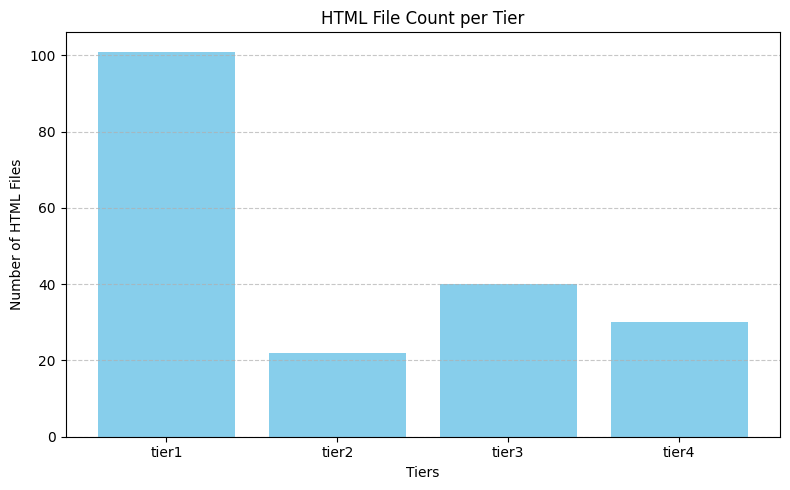

In [2]:
# V1.2

import os
import matplotlib.pyplot as plt

# Set the path to the "clones" directory
base_path = "/Users/daniel/Downloads/veridion/clones"

# Dictionary to store counts
html_file_counts = {}

# Loop through each tier directory
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        html_file_counts[tier] = len(html_files)

# Display result in console
for tier, count in html_file_counts.items():
    print(f"{tier}: {count} HTML files")

# Plotting the results
tiers = list(html_file_counts.keys())
counts = list(html_file_counts.values())

plt.figure(figsize=(8, 5))
plt.bar(tiers, counts, color='skyblue')
plt.xlabel('Tiers')
plt.ylabel('Number of HTML Files')
plt.title('HTML File Count per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


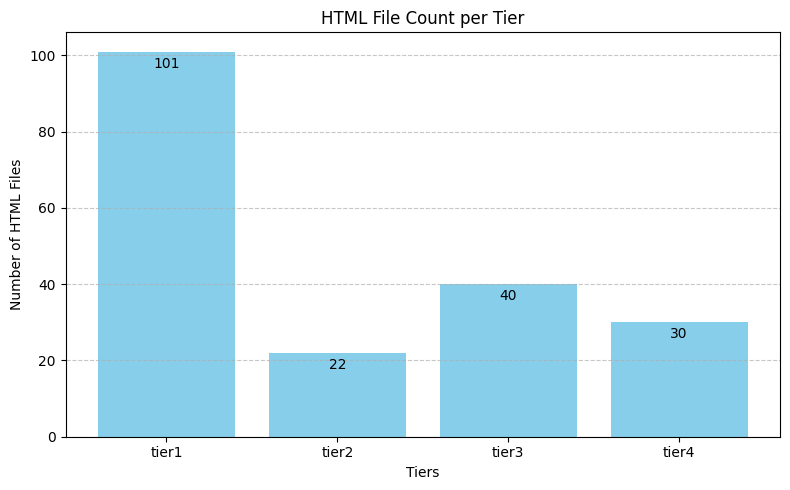

In [4]:
# V1.3

# Plotting the results
tiers = list(html_file_counts.keys())
counts = list(html_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='skyblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(count), 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Tiers')
plt.ylabel('Number of HTML Files')
plt.title('HTML File Count per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# V2 - Number of HTML TAGS in each file
GET the most common html tags in the dataset

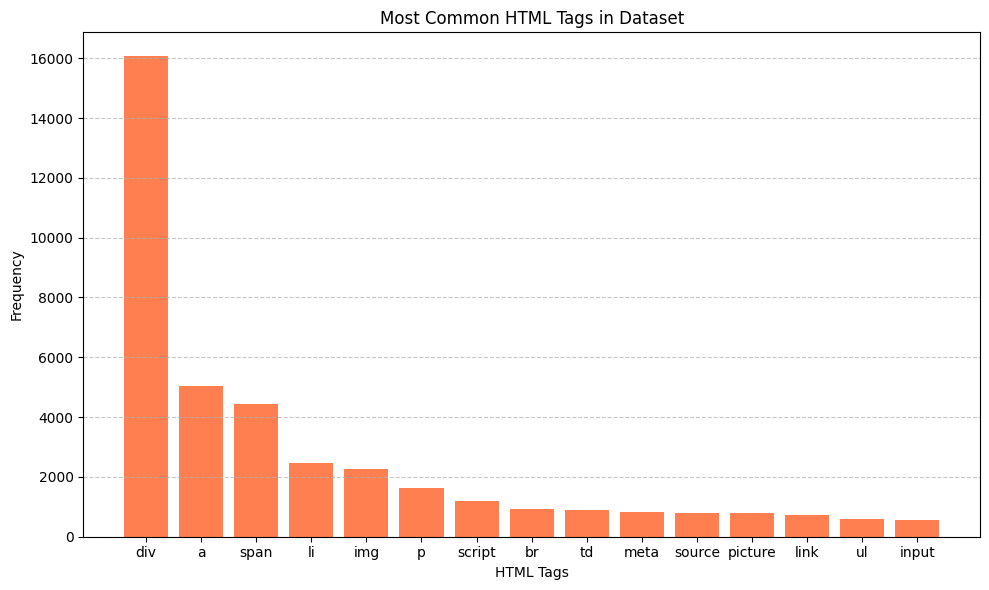

In [5]:
# V2.1

import os
from collections import Counter
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Set base directory
base_path = "/Users/daniel/Downloads/veridion/clones"

# Counter to track tag usage
tag_counter = Counter()

# Loop through tiers and files
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        for fname in os.listdir(tier_path):
            if fname.lower().endswith('.html'):
                file_path = os.path.join(tier_path, fname)
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    tags = [tag.name for tag in soup.find_all()]
                    tag_counter.update(tags)

# Display top 15 tags
most_common_tags = tag_counter.most_common(15)
tags, counts = zip(*most_common_tags)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(tags, counts, color='coral')
plt.title("Most Common HTML Tags in Dataset")
plt.xlabel("HTML Tags")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V3 - Maximum NUMBER OF LINES OF CODE in each folder
GET the number of max lines of code per folder tier

HTML file count per tier:
tier1: 101 files (max 775 lines)
tier2: 22 files (max 2634 lines)
tier3: 40 files (max 2159 lines)
tier4: 30 files (max 4667 lines)


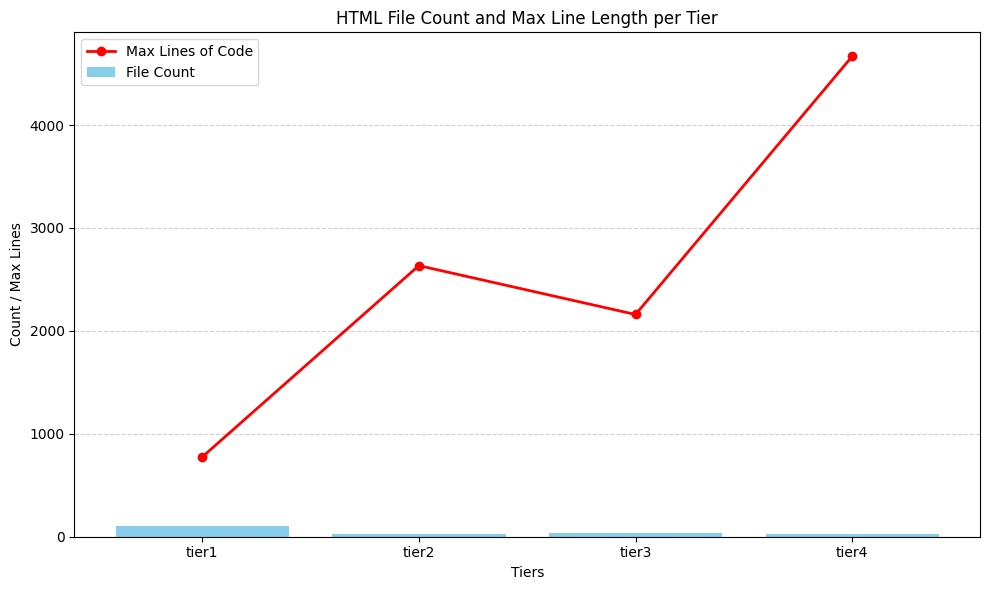

In [6]:
# V3.1

import os
import matplotlib.pyplot as plt

# Set the path to the "clones" directory
base_path = "/Users/daniel/Downloads/veridion/clones"

# Data storage
html_file_counts = {}        # number of files per tier
max_lines_per_tier = {}      # max lines per tier

# Loop through each tier
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        html_file_counts[tier] = len(html_files)
        
        max_lines = 0
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    line_count = sum(1 for _ in f)
                    if line_count > max_lines:
                        max_lines = line_count
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        max_lines_per_tier[tier] = max_lines

# Display results
print("HTML file count per tier:")
for tier, count in html_file_counts.items():
    print(f"{tier}: {count} files (max {max_lines_per_tier[tier]} lines)")

# Plotting
tiers = list(html_file_counts.keys())
counts = [html_file_counts[t] for t in tiers]
max_lines = [max_lines_per_tier[t] for t in tiers]

plt.figure(figsize=(10, 6))

# Bar for file count
plt.bar(tiers, counts, color='skyblue', label='File Count')

# Line for max lines of code
plt.plot(tiers, max_lines, color='red', marker='o', linewidth=2, label='Max Lines of Code')

plt.xlabel('Tiers')
plt.ylabel('Count / Max Lines')
plt.title('HTML File Count and Max Line Length per Tier')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# V4 - Number of maximum HTML FILE SIZE STORAGE per tier
GET the number of maximum HTML file size per tier

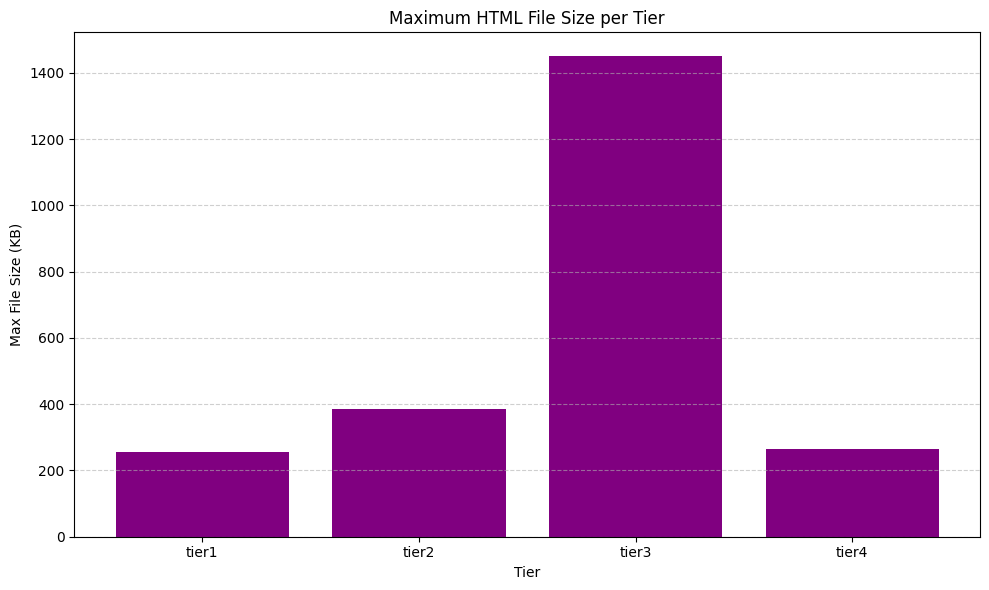

In [7]:
# V4.1

import os
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store max file size per tier ===
max_size_per_tier = {}

# === Loop through tiers and calculate max size ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        max_size = 0
        for fname in os.listdir(tier_path):
            if fname.lower().endswith('.html'):
                file_path = os.path.join(tier_path, fname)
                try:
                    size_bytes = os.path.getsize(file_path)
                    max_size = max(max_size, size_bytes)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
        max_size_per_tier[tier] = round(max_size / 1024, 2)  # Convert to KB

# === Plotting ===
tiers = list(max_size_per_tier.keys())
sizes = list(max_size_per_tier.values())

plt.figure(figsize=(10, 6))
plt.bar(tiers, sizes, color='purple')
plt.xlabel('Tier')
plt.ylabel('Max File Size (KB)')
plt.title('Maximum HTML File Size per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# V5 - Number of HTML files with STYLE tag per tier
GET the number of HTML files with <style> tag per tier

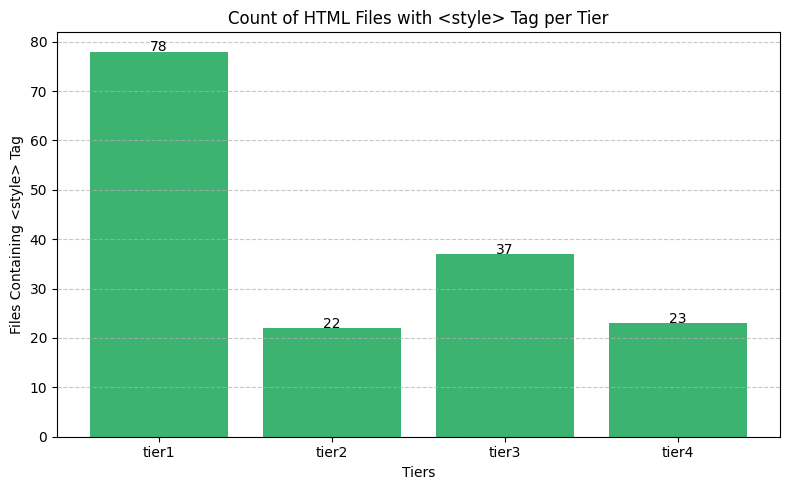

In [8]:
# V5.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <style> tag
style_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        style_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("style"):  # at least one <style> tag
                        style_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        style_file_counts[tier] = style_file_count

# === Plotting the results ===
tiers = list(style_file_counts.keys())
counts = list(style_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='mediumseagreen')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <style> Tag')
plt.title('Count of HTML Files with <style> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V6 - Number of HTML FILES with SCRIPT tag per tier
GET the number of HTML files with <script> tag per tier

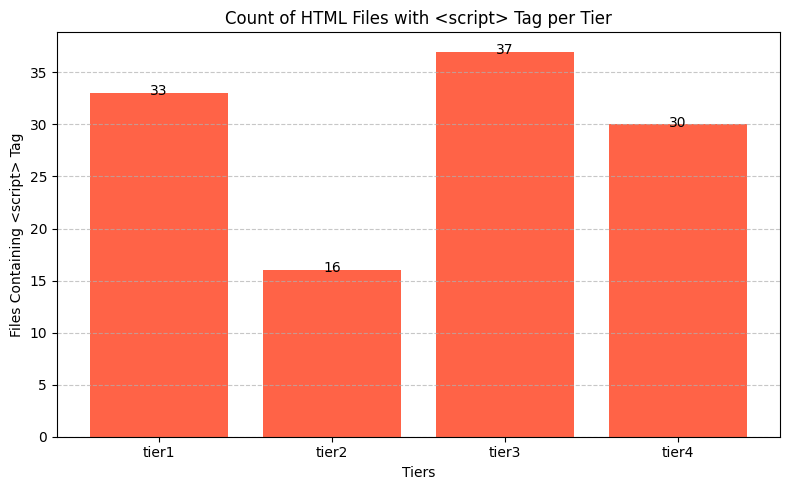

In [9]:
# V6.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <script> tag
script_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        script_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("script"):  # at least one <script> tag
                        script_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        script_file_counts[tier] = script_file_count

# === Plotting the results ===
tiers = list(script_file_counts.keys())
counts = list(script_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='tomato')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <script> Tag')
plt.title('Count of HTML Files with <script> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V7 - Number of HTML FILES with DIV tag per tier
GET the number of HTML files with <div> tag per tier

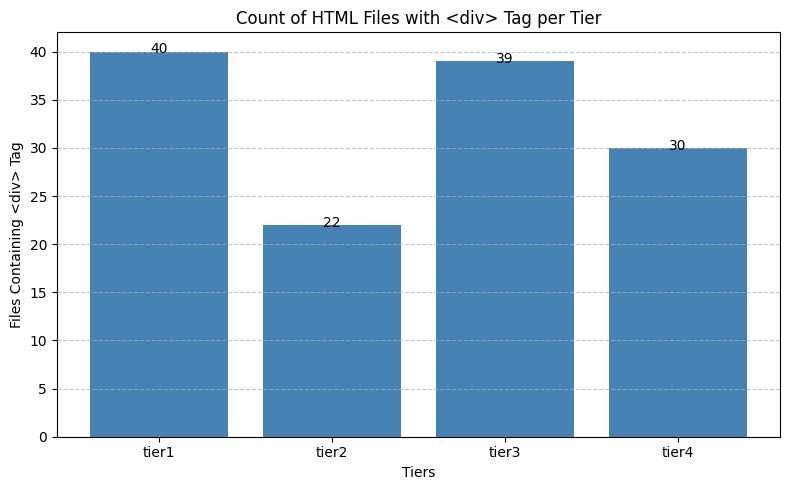

In [10]:
# V7.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <div> tag
div_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        div_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("div"):  # at least one <div> tag
                        div_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        div_file_counts[tier] = div_file_count

# === Plotting the results ===
tiers = list(div_file_counts.keys())
counts = list(div_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='steelblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <div> Tag')
plt.title('Count of HTML Files with <div> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V8 - Number of HTML FILES with A tag per tier
GET the number of HTML files with <a> tag per tier

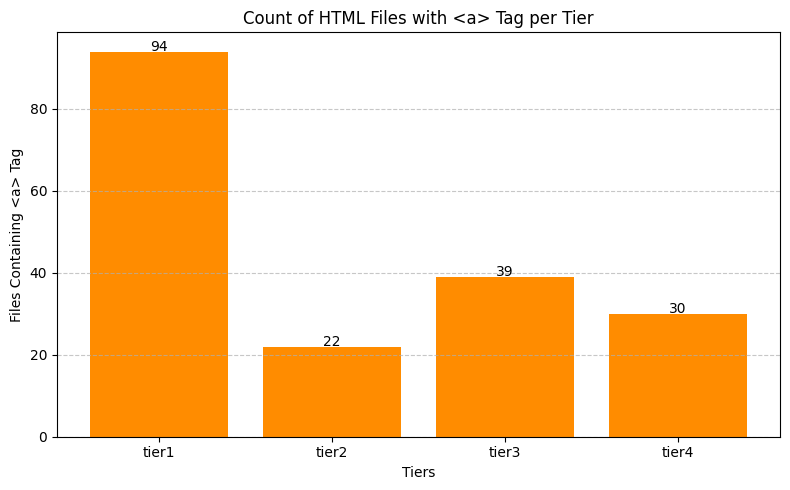

In [11]:
# V8.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <a> tag
a_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        a_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("a"):  # at least one <a> tag
                        a_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        a_file_counts[tier] = a_file_count

# === Plotting the results ===
tiers = list(a_file_counts.keys())
counts = list(a_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='darkorange')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <a> Tag')
plt.title('Count of HTML Files with <a> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V9 - Number of HTML FILES with SPAN tag per tier
GET the number of HTML files with <span> tag per tier

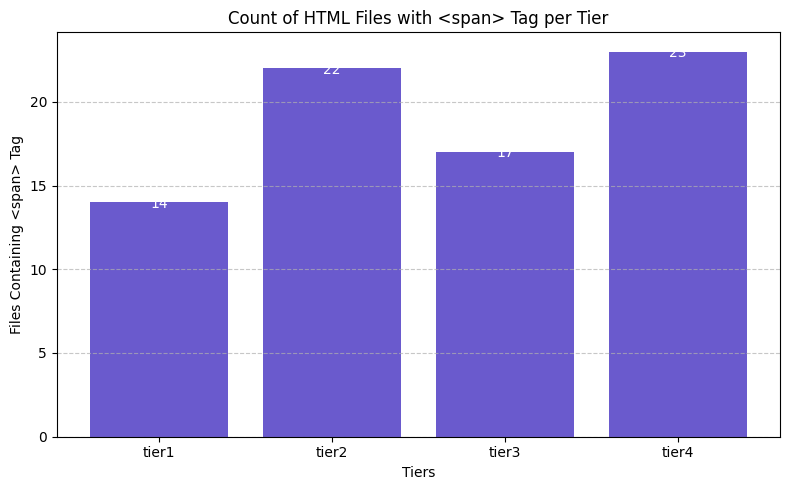

In [12]:
# V9.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <span> tag
span_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        span_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("span"):  # at least one <span> tag
                        span_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        span_tag_file_counts[tier] = span_file_count

# === Plotting the results ===
tiers = list(span_tag_file_counts.keys())
counts = list(span_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='slateblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <span> Tag')
plt.title('Count of HTML Files with <span> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# V10 - Number of HTML FILES with LI tag per tier
GET the number of HTML files with <li> tag per tier

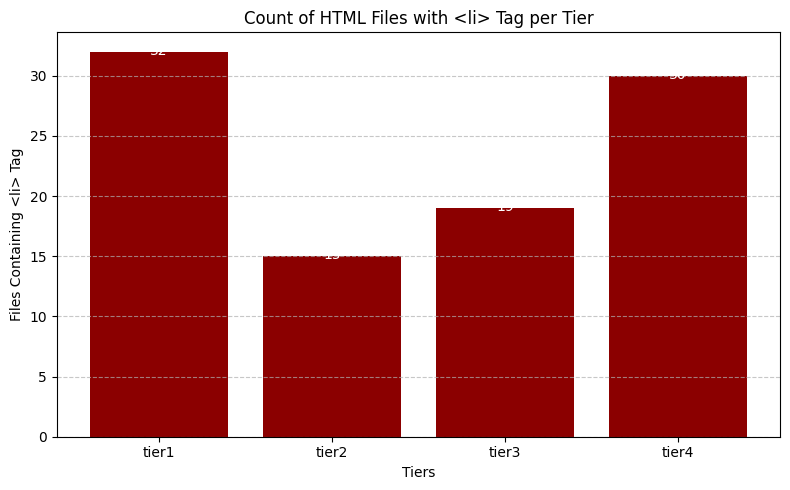

In [1]:
# V10.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <li> tag
li_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        li_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("li"):  # at least one <li> tag
                        li_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        li_tag_file_counts[tier] = li_file_count

# === Plotting the results ===
tiers = list(li_tag_file_counts.keys())
counts = list(li_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='darkred')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <li> Tag')
plt.title('Count of HTML Files with <li> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V11 - Number of HTML FILES with IMG tag per tier
GET the number of HTML files with <img> tag per tier

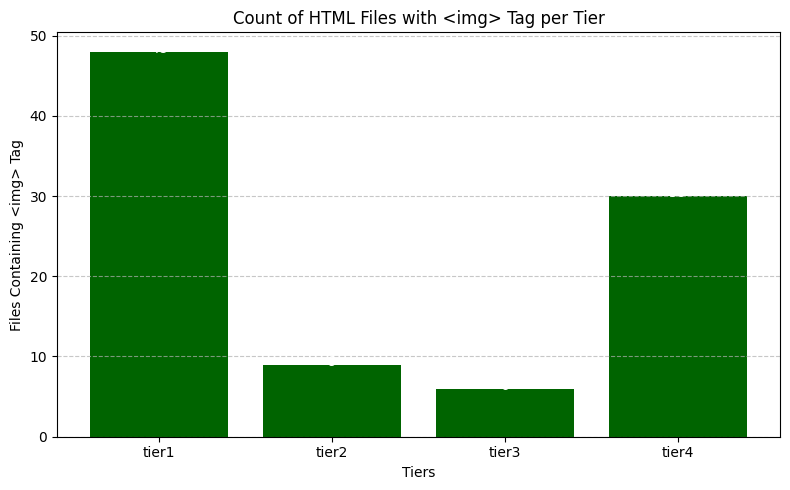

In [2]:
# V11.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <img> tag
img_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        img_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("img"):  # at least one <img> tag
                        img_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        img_tag_file_counts[tier] = img_file_count

# === Plotting the results ===
tiers = list(img_tag_file_counts.keys())
counts = list(img_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='darkgreen')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <img> Tag')
plt.title('Count of HTML Files with <img> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# V12 - Number of HTML FILES with P tag per tier
GET the number of HTML files with <p> tag per tier

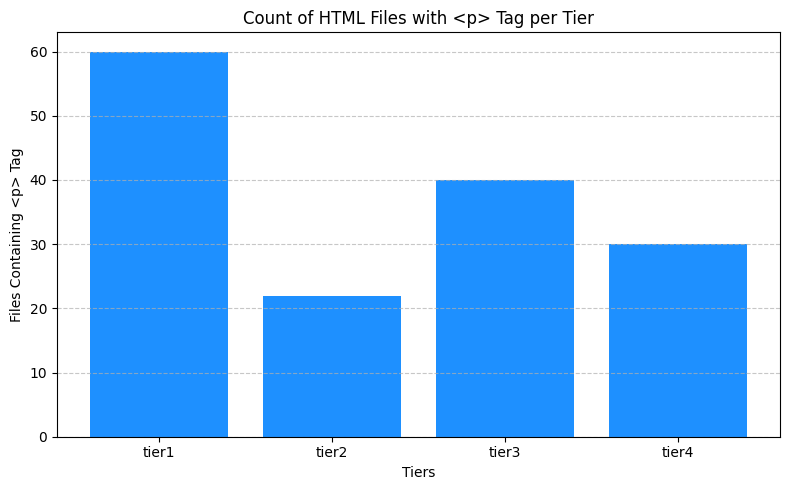

In [3]:
# V12.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <p> tag
p_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        p_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("p"):  # at least one <p> tag
                        p_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        p_tag_file_counts[tier] = p_file_count

# === Plotting the results ===
tiers = list(p_tag_file_counts.keys())
counts = list(p_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='dodgerblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <p> Tag')
plt.title('Count of HTML Files with <p> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V13 - Number of HTML FILES with BR tag per tier
GET the number of HTML files with <br> tag per tier

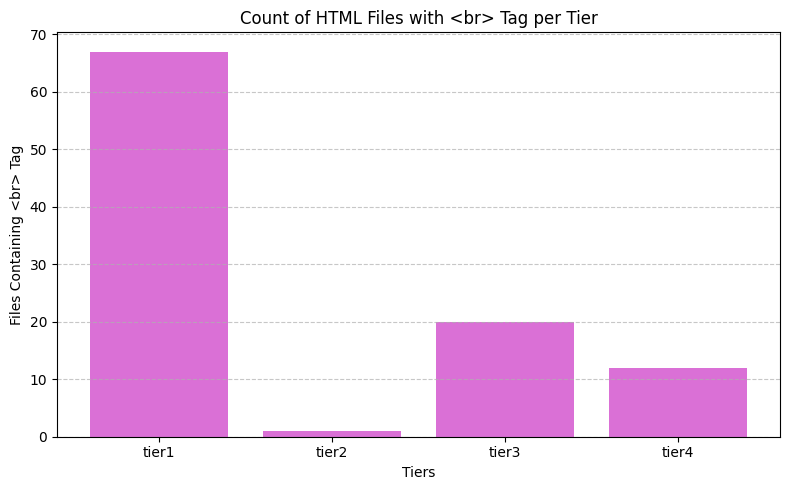

In [4]:
# V13.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <br> tag
br_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        br_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("br"):  # at least one <br> tag
                        br_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        br_tag_file_counts[tier] = br_file_count

# === Plotting the results ===
tiers = list(br_tag_file_counts.keys())
counts = list(br_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='orchid')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <br> Tag')
plt.title('Count of HTML Files with <br> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V14 - Number of HTML FILES with TD tag per tier
GET the number of HTML files with <td> tag per tier

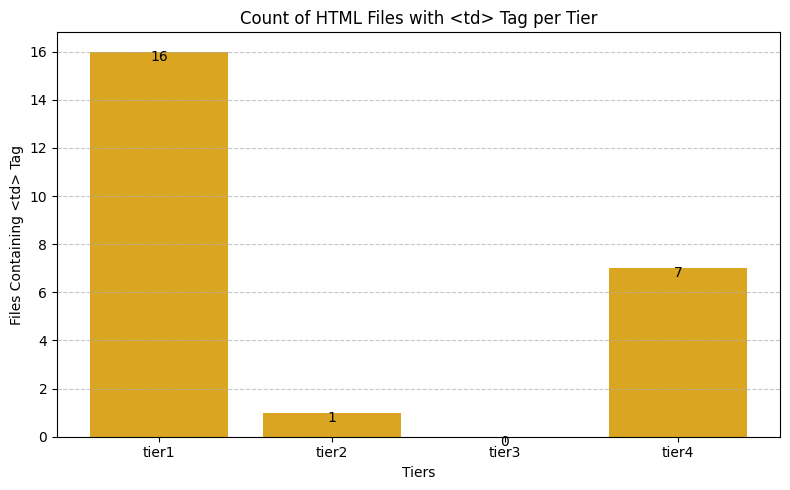

In [5]:
# V14.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <td> tag
td_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        td_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("td"):  # at least one <td> tag
                        td_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        td_tag_file_counts[tier] = td_file_count

# === Plotting the results ===
tiers = list(td_tag_file_counts.keys())
counts = list(td_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='goldenrod')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <td> Tag')
plt.title('Count of HTML Files with <td> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V15 - Number of HTML FILES with META tag per tier
GET the number of HTML files with <meta> tag per tier

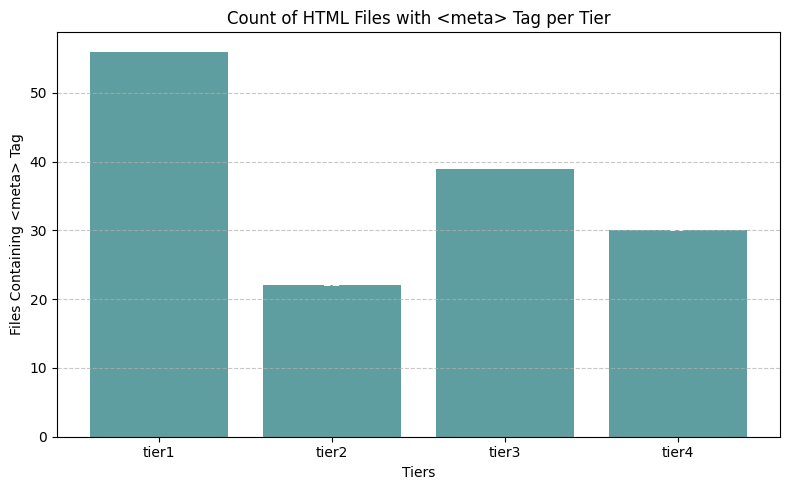

In [6]:
# V15.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <meta> tag
meta_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        meta_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("meta"):  # at least one <meta> tag
                        meta_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        meta_tag_file_counts[tier] = meta_file_count

# === Plotting the results ===
tiers = list(meta_tag_file_counts.keys())
counts = list(meta_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='cadetblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <meta> Tag')
plt.title('Count of HTML Files with <meta> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V16 - Number of HTML FILES with SOURCE tag per tier
GET the number of HTML files with <source> tag per tier

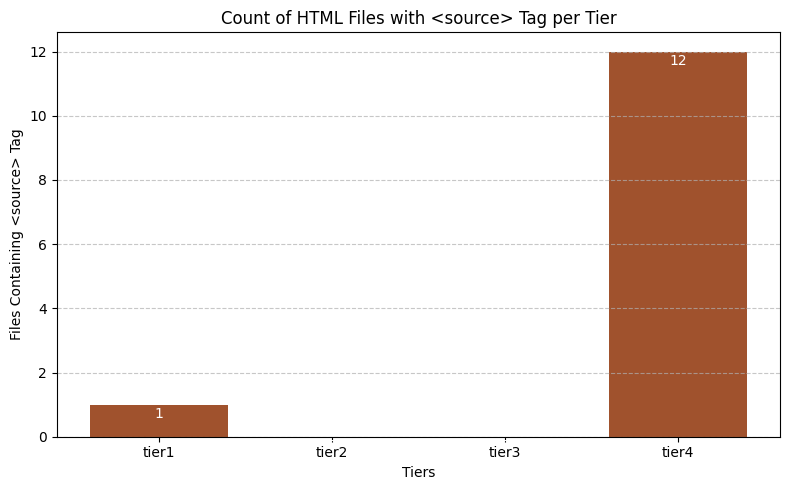

In [7]:
# V16.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <source> tag
source_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        source_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("source"):  # at least one <source> tag
                        source_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        source_tag_file_counts[tier] = source_file_count

# === Plotting the results ===
tiers = list(source_tag_file_counts.keys())
counts = list(source_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='sienna')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <source> Tag')
plt.title('Count of HTML Files with <source> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V17 - Number of HTML FILES with PICTURE tag per tier
GET the number of HTML files with <picture> tag per tier

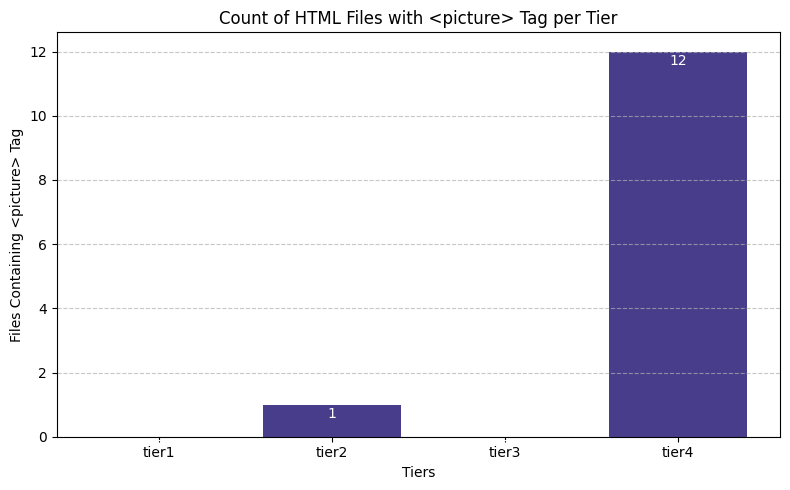

In [8]:
# V17.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <picture> tag
picture_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        picture_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("picture"):  # at least one <picture> tag
                        picture_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        picture_tag_file_counts[tier] = picture_file_count

# === Plotting the results ===
tiers = list(picture_tag_file_counts.keys())
counts = list(picture_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='darkslateblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <picture> Tag')
plt.title('Count of HTML Files with <picture> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# V18 - Number of HTML FILES with LINK tag per tier
GET the number of HTML files with <link> tag per tier

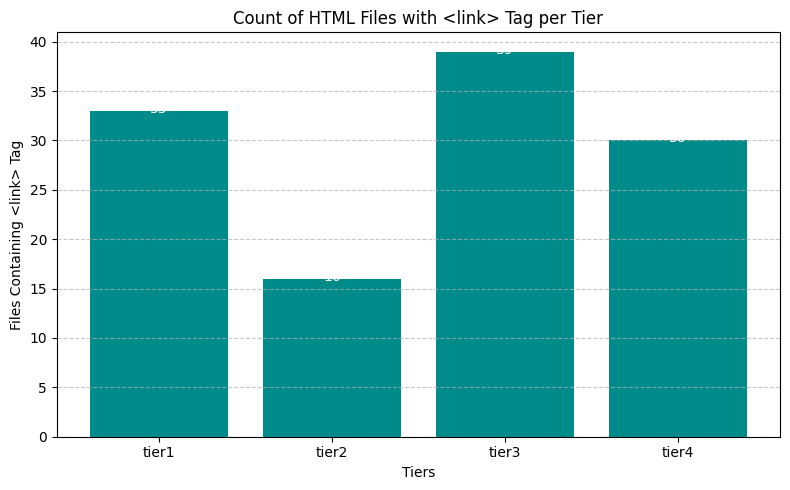

In [9]:
# V18.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <link> tag
link_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        link_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("link"):  # at least one <link> tag
                        link_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        link_tag_file_counts[tier] = link_file_count

# === Plotting the results ===
tiers = list(link_tag_file_counts.keys())
counts = list(link_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='darkcyan')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <link> Tag')
plt.title('Count of HTML Files with <link> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V19 - Number of HTML FILES with UL tag per tier
GET the number of HTML files with <ul> tag per tier

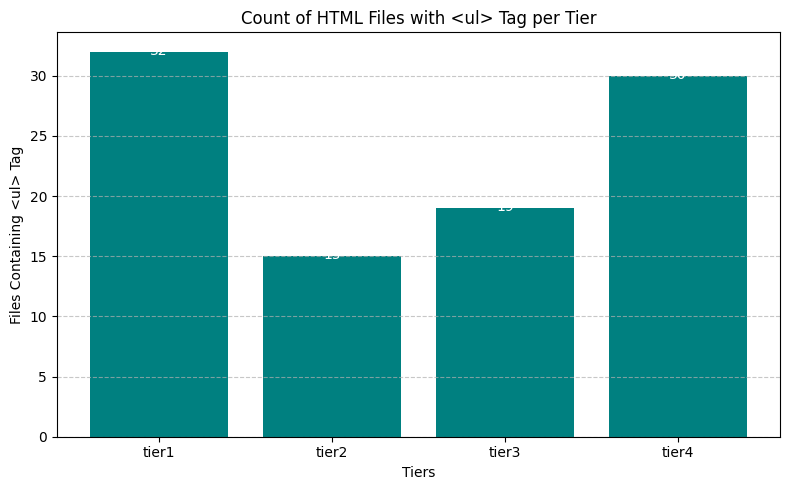

In [10]:
# V19.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <ul> tag
ul_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        ul_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("ul"):  # at least one <ul> tag
                        ul_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        ul_tag_file_counts[tier] = ul_file_count

# === Plotting the results ===
tiers = list(ul_tag_file_counts.keys())
counts = list(ul_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='teal')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <ul> Tag')
plt.title('Count of HTML Files with <ul> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V20 - Number of HTML FILES with INPUT tag per tier
GET the number of HTML files with <input> tag per tier

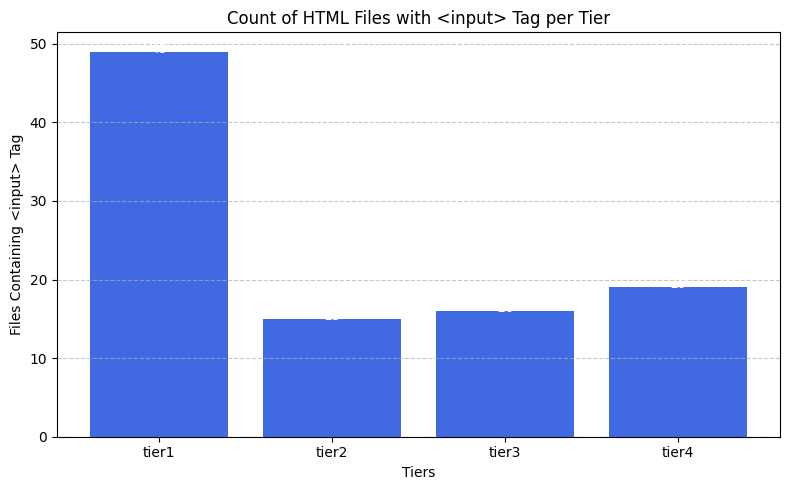

In [11]:
# V20.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <input> tag
input_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        input_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("input"):  # at least one <input> tag
                        input_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        input_tag_file_counts[tier] = input_file_count

# === Plotting the results ===
tiers = list(input_tag_file_counts.keys())
counts = list(input_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='royalblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <input> Tag')
plt.title('Count of HTML Files with <input> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# V21 - Number of HTML FILES with HTTP per tier
GET the number of HTML files with http appearence per tier

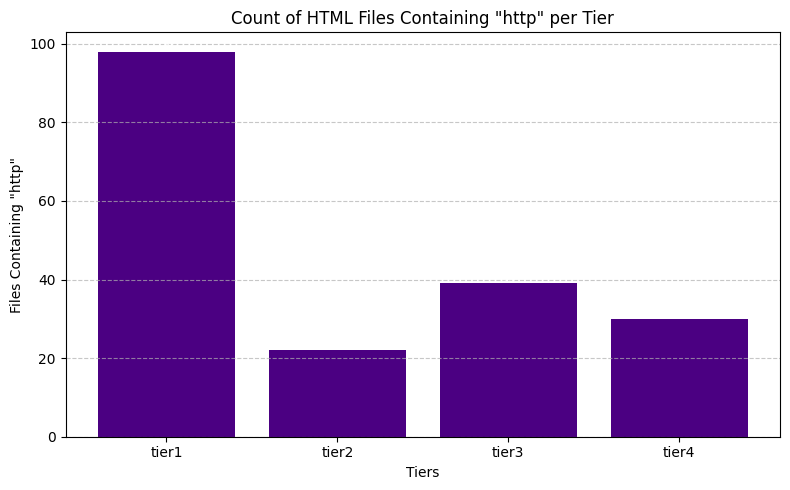

In [12]:

# V21.1

import os
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files contain "http" at least once
http_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        http_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                    if "http" in content.lower():  # check for "http" (case-insensitive)
                        http_count += 1
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        http_file_counts[tier] = http_count

# === Plotting the results ===
tiers = list(http_file_counts.keys())
counts = list(http_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='indigo')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing "http"')
plt.title('Count of HTML Files Containing "http" per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V22 - Number of HTML FILES with HTTPS per tier
GET the number of HTML files with https appearence per tier

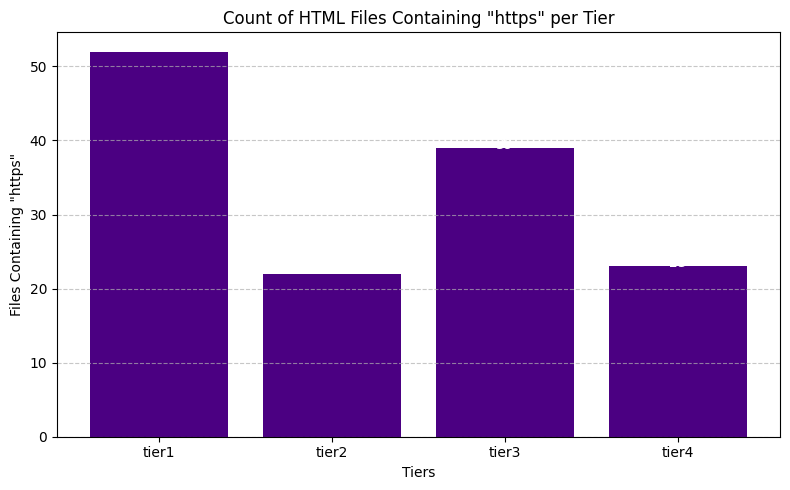

In [15]:

# V22.1

import os
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files contain "http" at least once
http_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        http_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                    if "https" in content.lower():  # check for "http" (case-insensitive)
                        http_count += 1
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        http_file_counts[tier] = http_count

# === Plotting the results ===
tiers = list(http_file_counts.keys())
counts = list(http_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='indigo')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing "https"')
plt.title('Count of HTML Files Containing "https" per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V23 - Number of duplicated files content per tier
GET the number of HTML files with duplicated files content per tier

In [16]:
# V23.1

import os
import hashlib

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Function to hash file content
def hash_file(file_path):
    hasher = hashlib.sha256()
    with open(file_path, 'rb') as f:
        while chunk := f.read(8192):
            hasher.update(chunk)
    return hasher.hexdigest()

# === Dictionary to store number of duplicate files per tier
duplicate_counts = {}

# === Process each tier
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        hashes = {}
        duplicates = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                file_hash = hash_file(file_path)
                if file_hash in hashes:
                    duplicates += 1
                else:
                    hashes[file_hash] = fname
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        duplicate_counts[tier] = duplicates

# === Display Results
print("Duplicate HTML files found per tier:")
for tier, count in duplicate_counts.items():
    print(f"{tier}: {count} duplicates")


Duplicate HTML files found per tier:
tier1: 42 duplicates
tier2: 2 duplicates
tier3: 0 duplicates
tier4: 0 duplicates


Duplicate HTML files found per tier:
tier1: 42 duplicates
tier2: 2 duplicates
tier3: 0 duplicates
tier4: 0 duplicates


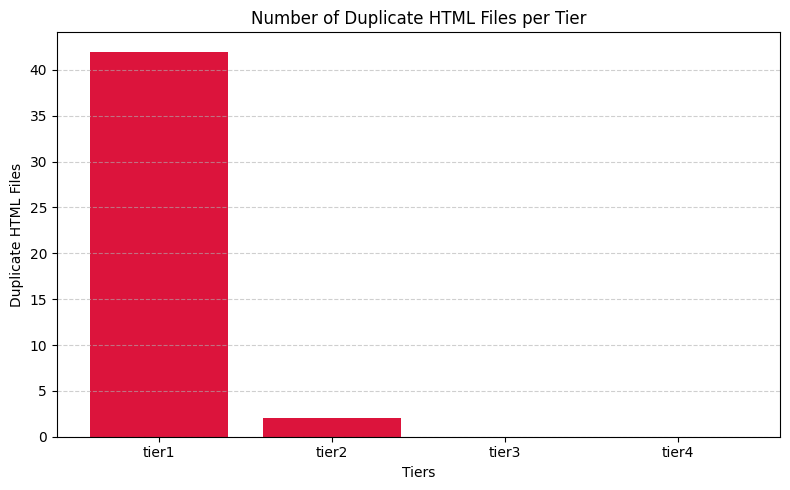

In [17]:
# V23.2

import os
import hashlib
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Function to hash file content
def hash_file(file_path):
    hasher = hashlib.sha256()
    with open(file_path, 'rb') as f:
        while chunk := f.read(8192):
            hasher.update(chunk)
    return hasher.hexdigest()

# === Dictionary to store number of duplicate files per tier
duplicate_counts = {}

# === Process each tier
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        hashes = {}
        duplicates = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                file_hash = hash_file(file_path)
                if file_hash in hashes:
                    duplicates += 1
                else:
                    hashes[file_hash] = fname
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        duplicate_counts[tier] = duplicates

# === Print results in console
print("Duplicate HTML files found per tier:")
for tier, count in duplicate_counts.items():
    print(f"{tier}: {count} duplicates")

# === Plotting results
tiers = list(duplicate_counts.keys())
counts = list(duplicate_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='crimson')

# Add labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel("Tiers")
plt.ylabel("Duplicate HTML Files")
plt.title("Number of Duplicate HTML Files per Tier")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Duplicate HTML file names per tier:
tier1: 0 duplicate names
tier2: 0 duplicate names
tier3: 0 duplicate names
tier4: 0 duplicate names


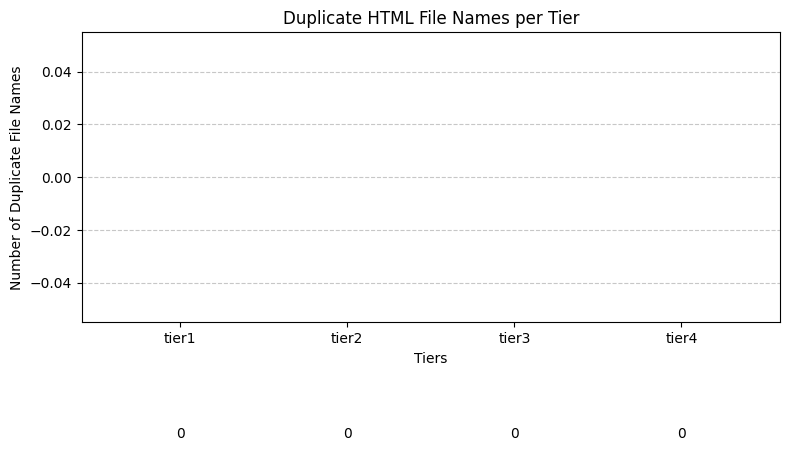

In [18]:
# V23.3

import os
from collections import Counter
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store number of duplicated filenames per tier
duplicate_filename_counts = {}

# === Loop through each tier directory
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        name_counter = Counter(html_files)
        duplicates = sum(1 for count in name_counter.values() if count > 1)
        duplicate_filename_counts[tier] = duplicates

# === Display results in console
print("Duplicate HTML file names per tier:")
for tier, count in duplicate_filename_counts.items():
    print(f"{tier}: {count} duplicate names")

# === Plot the results
tiers = list(duplicate_filename_counts.keys())
counts = list(duplicate_filename_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='orange')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1, str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Tiers')
plt.ylabel('Number of Duplicate File Names')
plt.title('Duplicate HTML File Names per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V24 - Number of HTML files with length of file name
GET the number of HTML files with length of file name per tier

Max character count per tier:
tier1: 260405 characters
tier2: 393887 characters
tier3: 1484148 characters
tier4: 256118 characters


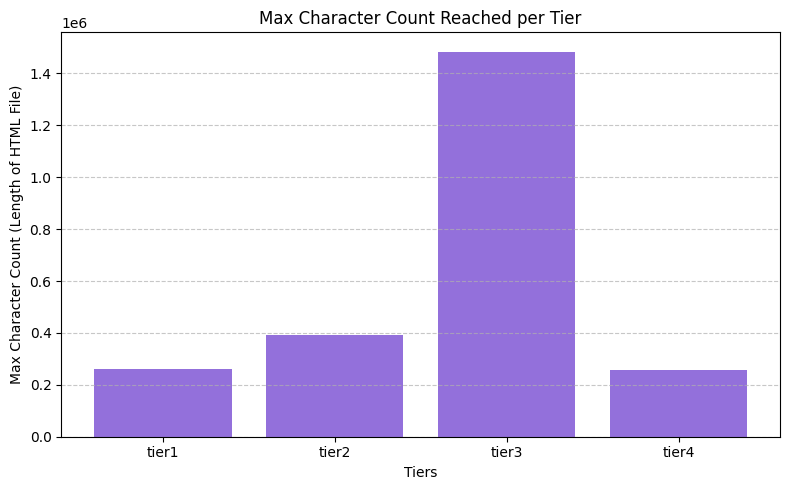

In [19]:
# V24.1

import os
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store the max character count per tier
max_char_count_per_tier = {}

# === Loop through each tier
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        max_chars = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                    char_count = len(content)
                    if char_count > max_chars:
                        max_chars = char_count
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        max_char_count_per_tier[tier] = max_chars

# === Display results
print("Max character count per tier:")
for tier, count in max_char_count_per_tier.items():
    print(f"{tier}: {count} characters")

# === Plotting
tiers = list(max_char_count_per_tier.keys())
counts = list(max_char_count_per_tier.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='mediumpurple')

# Add labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 50, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Max Character Count (Length of HTML File)')
plt.title('Max Character Count Reached per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Max filename length (excluding .html) per tier:
tier1: 33 characters
tier2: 29 characters
tier3: 34 characters
tier4: 33 characters


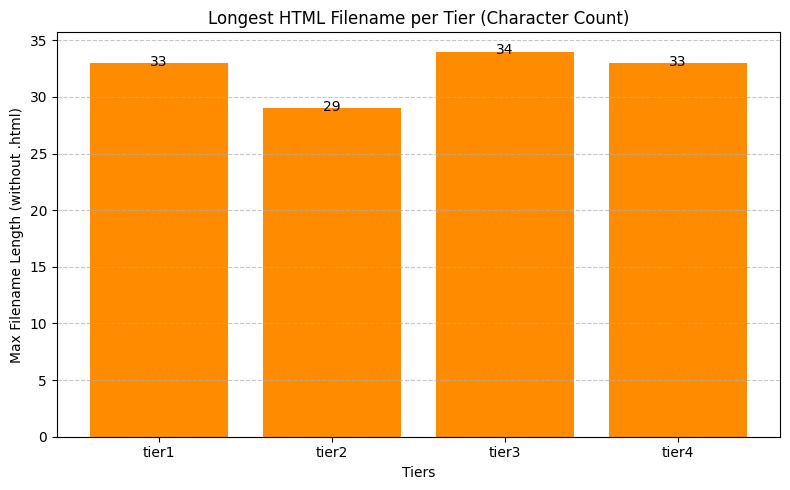

In [20]:
# V24.2

import os
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store max filename length per tier
max_name_length_per_tier = {}

# === Loop through each tier
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        max_length = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            name_only = fname.rsplit('.html', 1)[0]
            name_length = len(name_only)
            if name_length > max_length:
                max_length = name_length
        max_name_length_per_tier[tier] = max_length

# === Print results
print("Max filename length (excluding .html) per tier:")
for tier, count in max_name_length_per_tier.items():
    print(f"{tier}: {count} characters")

# === Plotting
tiers = list(max_name_length_per_tier.keys())
lengths = list(max_name_length_per_tier.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, lengths, color='darkorange')

# Add labels on bars
for bar, count in zip(bars, lengths):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Tiers')
plt.ylabel('Max Filename Length (without .html)')
plt.title('Longest HTML Filename per Tier (Character Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V25 - Number of most common domain extensions
GET the number of most common domain extensions per tier

Top domain extensions in HTML filenames:
.com: 106 times
.ru: 12 times
.online: 7 times
.shop: 6 times
.org: 5 times
.de: 5 times
.site: 4 times
.uk: 3 times
.net: 3 times
.eu: 3 times


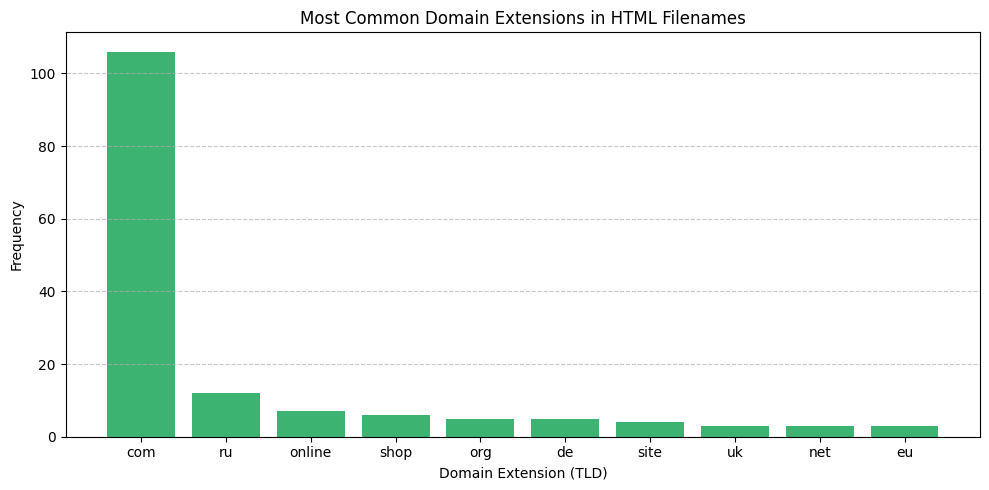

In [21]:
# V25.1

import os
from collections import Counter
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Counter to store domain extensions
tld_counter = Counter()

# === Loop through tiers and extract TLDs from filenames
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        for fname in os.listdir(tier_path):
            if fname.lower().endswith('.html'):
                name_only = fname.rsplit('.html', 1)[0]  # remove .html
                parts = name_only.split('.')              # split by '.'
                if len(parts) > 1:
                    tld = parts[-1].lower()               # last part is the TLD
                    tld_counter[tld] += 1

# === Get most common TLDs
top_tlds = tld_counter.most_common(10)  # top 10 most common
labels, counts = zip(*top_tlds)

# === Print to console
print("Top domain extensions in HTML filenames:")
for tld, count in top_tlds:
    print(f".{tld}: {count} times")

# === Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, counts, color='mediumseagreen')

# Add labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.3, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Domain Extension (TLD)')
plt.ylabel('Frequency')
plt.title('Most Common Domain Extensions in HTML Filenames')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# V26 - Number of websites that have request
GET the number of tracks how many domains respond successfully

Reachable websites per tier:
.DS_Store: 0 of 0 reachable
tier1: 52 of 101 reachable
tier2: 15 of 22 reachable
tier3: 15 of 40 reachable
tier4: 11 of 30 reachable


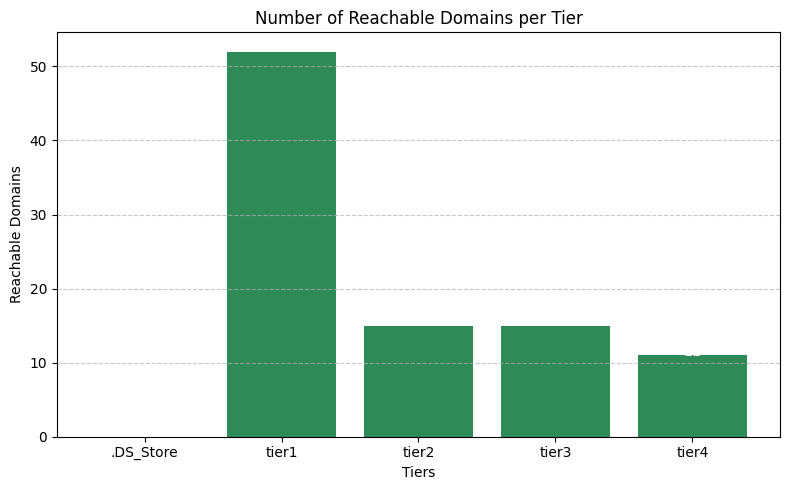

In [23]:
# V26.1

import os
import requests
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"
timeout_seconds = 5

# === Dictionary to store reachability count per tier
reachable_counts = {}
total_html_files = {}

# === Function to extract domain from filename
def extract_domain(filename):
    if filename.lower().endswith('.html'):
        return filename[:-5]  # remove ".html"
    return filename

# === Loop through each tier
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    reachable = 0
    total = 0

    if os.path.isdir(tier_path):
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        total = len(html_files)

        for fname in html_files:
            domain = extract_domain(fname)
            for scheme in ["https", "http"]:  # try https first, then fallback to http
                try:
                    response = requests.get(f"{scheme}://{domain}", timeout=timeout_seconds)
                    if response.status_code < 400:
                        reachable += 1
                        break  # don't retry http if https works
                except requests.RequestException:
                    continue  # try next scheme or move on

    reachable_counts[tier] = reachable
    total_html_files[tier] = total

# === Console output
print("Reachable websites per tier:")
for tier in reachable_counts:
    print(f"{tier}: {reachable_counts[tier]} of {total_html_files[tier]} reachable")

# === Plotting
tiers = list(reachable_counts.keys())
reachable = list(reachable_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, reachable, color='seagreen')

# Add labels
for bar, count in zip(bars, reachable):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Reachable Domains')
plt.title('Number of Reachable Domains per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Reachable websites per tier:
.DS_Store: 0 of 0 reachable
tier1: 52 of 101 reachable
tier2: 14 of 22 reachable
tier3: 15 of 40 reachable
tier4: 11 of 30 reachable


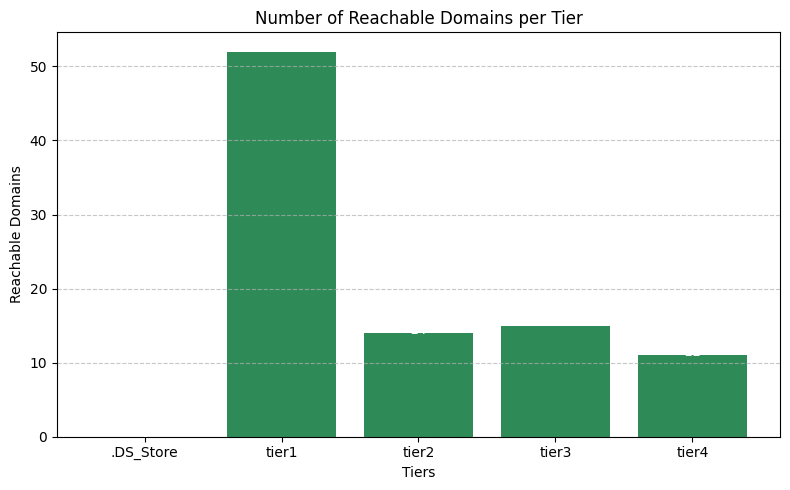

Reachable websites saved to: reachable_websites_by_tier.csv


In [1]:
# V26.2

import os
import requests
import matplotlib.pyplot as plt
import csv

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"
timeout_seconds = 5
csv_output_path = "reachable_websites_by_tier.csv"

# === Store counts and reachable domains
reachable_counts = {}
total_html_files = {}
reachable_by_tier = {}

# === Extract domain from filename
def extract_domain(filename):
    if filename.lower().endswith('.html'):
        return filename[:-5]  # remove .html
    return filename

# === Loop through each tier and check domains
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    reachable = []
    total = 0

    if os.path.isdir(tier_path):
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        total = len(html_files)

        for fname in html_files:
            domain = extract_domain(fname)
            for scheme in ["https", "http"]:
                try:
                    response = requests.get(f"{scheme}://{domain}", timeout=timeout_seconds)
                    if response.status_code < 400:
                        reachable.append(f"{scheme}://{domain}")
                        break  # no need to try the next scheme
                except requests.RequestException:
                    continue  # try the next scheme or move on

    reachable_counts[tier] = len(reachable)
    total_html_files[tier] = total
    reachable_by_tier[tier] = reachable

# === Console Output
print("Reachable websites per tier:")
for tier in reachable_counts:
    print(f"{tier}: {reachable_counts[tier]} of {total_html_files[tier]} reachable")

# === Plotting
tiers = list(reachable_counts.keys())
counts = list(reachable_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='seagreen')

# Add labels
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Reachable Domains')
plt.title('Number of Reachable Domains per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Save to CSV
with open(csv_output_path, "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    for tier, urls in reachable_by_tier.items():
        writer.writerow([tier])  # write the tier as a header row
        for url in urls:
            writer.writerow([url])  # write each reachable URL under that tier
        writer.writerow([])  # blank line between tiers

print(f"Reachable websites saved to: {csv_output_path}")


In [ ]:
# !pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [requests]


# V27 - Number of HTML FILES with TITLE tag per tier
GET the number of HTML files with <title> tag per tier

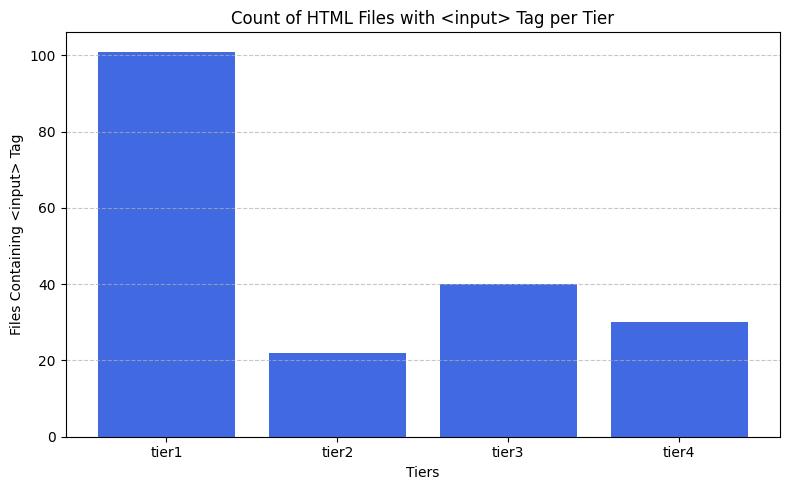

In [2]:
# V27.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <input> tag
input_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        input_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("title"):  # at least one <input> tag
                        input_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        input_tag_file_counts[tier] = input_file_count

# === Plotting the results ===
tiers = list(input_tag_file_counts.keys())
counts = list(input_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='royalblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <input> Tag')
plt.title('Count of HTML Files with <input> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [3]:
# V27.2

import os
import csv
from bs4 import BeautifulSoup

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"
output_csv = "duplicate_titles_report.csv"

# === Dictionary to store title → list of filenames
title_to_files = {}

# === Loop through all tiers and extract titles
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        for fname in os.listdir(tier_path):
            if fname.lower().endswith(".html"):
                file_path = os.path.join(tier_path, fname)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        soup = BeautifulSoup(f, "html.parser")
                        title_tag = soup.find("title")
                        if title_tag and title_tag.text.strip():
                            title = title_tag.text.strip()
                            title_to_files.setdefault(title, []).append(fname)
                except Exception as e:
                    print(f"Error parsing {file_path}: {e}")

# === Filter only titles that appear in more than one file
duplicate_titles = {title: files for title, files in title_to_files.items() if len(files) > 1}

# === Output to CSV
with open(output_csv, "w", newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Title", "Count", "Files"])
    for title, files in duplicate_titles.items():
        writer.writerow([title, len(files), "; ".join(files)])

print(f"Saved duplicate titles report to {output_csv}")


Saved duplicate titles report to duplicate_titles_report.csv


In [4]:
# V27.3

import os
import csv
from bs4 import BeautifulSoup

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"
output_csv = "duplicate_titles_with_tiers.csv"

# === Dictionary to store title → list of (tier, filename)
title_to_locations = {}

# === Loop through all tiers and extract <title>
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        for fname in os.listdir(tier_path):
            if fname.lower().endswith(".html"):
                file_path = os.path.join(tier_path, fname)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        soup = BeautifulSoup(f, "html.parser")
                        title_tag = soup.find("title")
                        if title_tag and title_tag.text.strip():
                            title = title_tag.text.strip()
                            title_to_locations.setdefault(title, []).append((tier, fname))
                except Exception as e:
                    print(f"Error parsing {file_path}: {e}")

# === Filter only titles used in more than one file
duplicate_titles = {title: locations for title, locations in title_to_locations.items() if len(locations) > 1}

# === Write to CSV
with open(output_csv, "w", newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Title", "Count", "Files", "Tiers"])
    for title, locations in duplicate_titles.items():
        files = [f for _, f in locations]
        tiers = [t for t, _ in locations]
        writer.writerow([title, len(locations), "; ".join(files), "; ".join(tiers)])

print(f"Saved duplicate titles report with tiers to: {output_csv}")


Saved duplicate titles report with tiers to: duplicate_titles_with_tiers.csv


# V28 - Number of HTML FILES with BODY tag per tier
GET the number of HTML files with <body> tag per tier

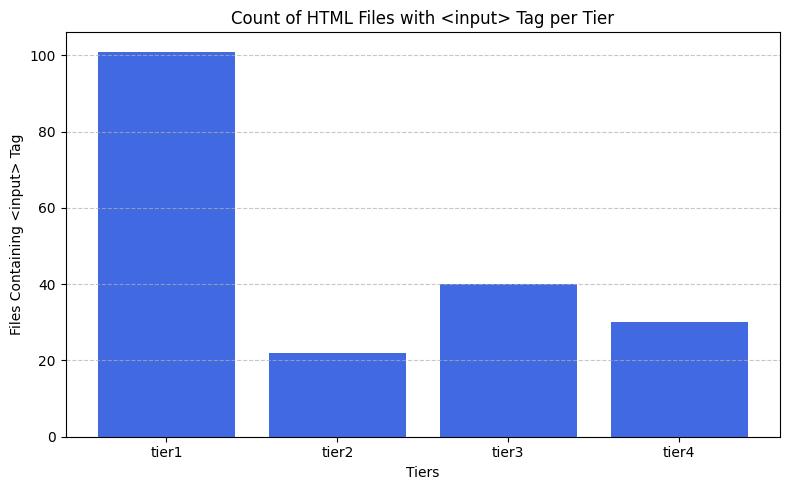

In [5]:
#V28.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Dictionary to store: how many files in each tier contain at least one <input> tag
input_tag_file_counts = {}
html_file_counts = {}

# === Loop through tiers ===
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        input_file_count = 0
        html_files = [f for f in os.listdir(tier_path) if f.lower().endswith('.html')]
        for fname in html_files:
            file_path = os.path.join(tier_path, fname)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, "html.parser")
                    if soup.find("body"):  # at least one <input> tag
                        input_file_count += 1
            except Exception as e:
                print(f"Error parsing {file_path}: {e}")
        html_file_counts[tier] = len(html_files)
        input_tag_file_counts[tier] = input_file_count

# === Plotting the results ===
tiers = list(input_tag_file_counts.keys())
counts = list(input_tag_file_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='royalblue')

# Add labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel('Tiers')
plt.ylabel('Files Containing <input> Tag')
plt.title('Count of HTML Files with <input> Tag per Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# V29 - Number of HTML FILES with correct format
GET the number of HTML files with correct format per tier

Well-structured HTML files per tier:
tier1: 101 of 101
tier2: 22 of 22
tier3: 40 of 40
tier4: 30 of 30


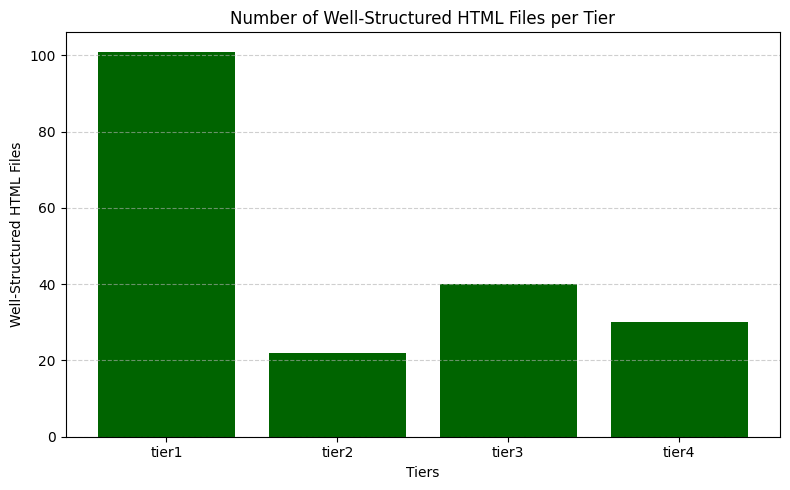

In [6]:
#V29.1

import os
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"

# === Results per tier
well_structured_counts = {}
total_counts = {}

# === Function to check structure
def is_well_structured(soup):
    return (
        soup.find("html") is not None and
        soup.find("head") is not None and
        soup.find("body") is not None and
        soup.find("title") is not None
    )

# === Loop through tiers
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        well_structured = 0
        total = 0
        for fname in os.listdir(tier_path):
            if fname.lower().endswith(".html"):
                total += 1
                file_path = os.path.join(tier_path, fname)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        soup = BeautifulSoup(f, "html.parser")
                        if is_well_structured(soup):
                            well_structured += 1
                except Exception as e:
                    print(f"Error parsing {file_path}: {e}")
        well_structured_counts[tier] = well_structured
        total_counts[tier] = total

# === Print results
print("Well-structured HTML files per tier:")
for tier in well_structured_counts:
    print(f"{tier}: {well_structured_counts[tier]} of {total_counts[tier]}")

# === Plotting
tiers = list(well_structured_counts.keys())
counts = list(well_structured_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='darkgreen')

# Add labels
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel("Tiers")
plt.ylabel("Well-Structured HTML Files")
plt.title("Number of Well-Structured HTML Files per Tier")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [7]:
# !pip install lxml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 218.5 kB/s eta 0:00:00a 0:00:02


HTML formatting issues per tier:
tier1: 33 of 101 files have issues
tier2: 21 of 22 files have issues
tier3: 36 of 40 files have issues
tier4: 11 of 30 files have issues


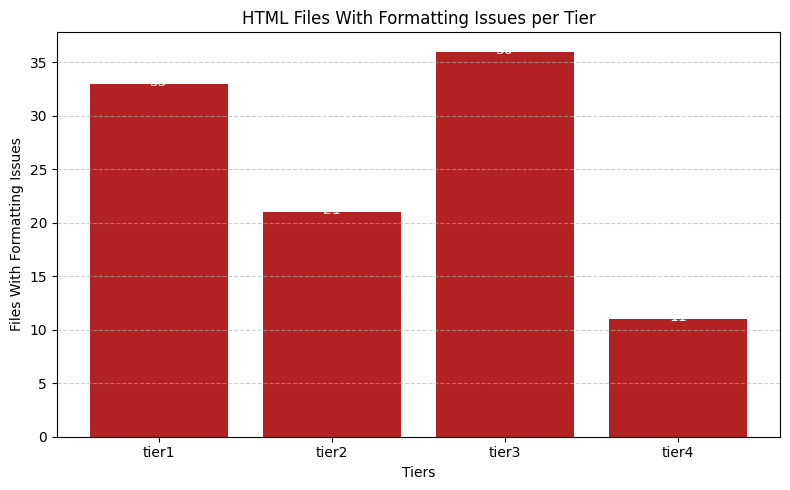

Saved list of problematic files to: html_format_issues.csv


In [9]:
#V29.2

import os
import csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"
line_length_threshold = 1000  # max allowed line length
output_csv_path = "html_format_issues.csv"

# === Store results
format_issue_counts = {}
total_counts = {}
problem_files = []  # (tier, filename, issue type)

# === Function to check for formatting issues
def has_formatting_issues(html_content, soup):
    issues = 0

    # 1. Check for overly long lines
    lines = html_content.splitlines()
    long_lines = [line for line in lines if len(line) > line_length_threshold]
    if long_lines:
        issues += 1

    # 2. Check for empty CSS rulesets
    for style in soup.find_all("style"):
        if "{}" in style.text.replace(" ", "").replace("\n", ""):
            issues += 1
            break

    return issues > 0

# === Loop through tiers
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        issue_count = 0
        total = 0

        for fname in os.listdir(tier_path):
            if fname.lower().endswith(".html"):
                total += 1
                file_path = os.path.join(tier_path, fname)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        content = f.read()
                        try:
                            soup = BeautifulSoup(content, "lxml")
                        except Exception:
                            soup = BeautifulSoup(content, "html.parser")  # fallback

                        if has_formatting_issues(content, soup):
                            issue_count += 1
                            problem_files.append((tier, fname, "Formatting issue"))
                except Exception as e:
                    print(f"Error parsing {file_path}: {e}")
                    issue_count += 1
                    problem_files.append((tier, fname, "Parse error"))

        format_issue_counts[tier] = issue_count
        total_counts[tier] = total

# === Print summary
print("HTML formatting issues per tier:")
for tier in format_issue_counts:
    print(f"{tier}: {format_issue_counts[tier]} of {total_counts[tier]} files have issues")

# === Plotting
tiers = list(format_issue_counts.keys())
counts = list(format_issue_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='firebrick')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel("Tiers")
plt.ylabel("Files With Formatting Issues")
plt.title("HTML Files With Formatting Issues per Tier")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# === Save issues to CSV
with open(output_csv_path, "w", newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Tier", "Filename", "Issue Type"])
    for row in problem_files:
        writer.writerow(row)

print(f"Saved list of problematic files to: {output_csv_path}")


Total issues per tier (format + diagnostics):
tier1: 33 of 101 files have issues
tier2: 21 of 22 files have issues
tier3: 36 of 40 files have issues
tier4: 11 of 30 files have issues


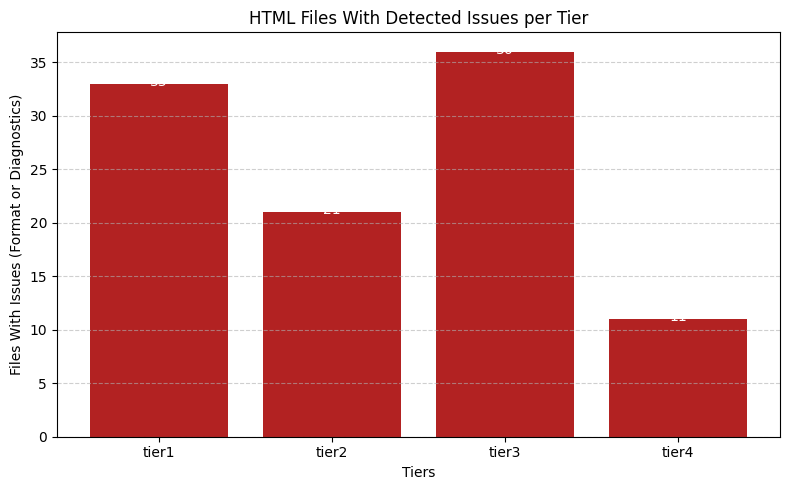

Saved list of problematic files to: html_format_issues_combined.csv


In [10]:
#V29.3

import os
import csv
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# === CONFIG ===
base_path = "/Users/daniel/Downloads/veridion/clones"
diagnostic_json_path = "diagnostics.json"  # path to your diagnostics file
line_length_threshold = 1000
output_csv_path = "html_format_issues_combined.csv"

# === Storage
format_issue_counts = {}
total_counts = {}
problem_files = []  # (tier, filename, issue_type)

# === Load diagnostics
diagnostics = {}
if os.path.exists(diagnostic_json_path):
    with open(diagnostic_json_path, "r", encoding="utf-8") as f:
        raw_diagnostics = json.load(f)
        for entry in raw_diagnostics:
            resource = entry.get("resource")
            if resource and resource.endswith(".html"):
                fname = os.path.basename(resource)
                tier = resource.split("/")[-2]  # assumes /clones/tierX/filename.html
                diagnostics.setdefault((tier, fname), []).append(entry)

# === Check for formatting issues
def has_formatting_issues(html_content, soup):
    issues = 0

    # 1. Long lines
    lines = html_content.splitlines()
    if any(len(line) > line_length_threshold for line in lines):
        issues += 1

    # 2. Empty CSS rulesets
    for style in soup.find_all("style"):
        if "{}" in style.text.replace(" ", "").replace("\n", ""):
            issues += 1
            break

    return issues > 0

# === Loop through HTML files
for tier in sorted(os.listdir(base_path)):
    tier_path = os.path.join(base_path, tier)
    if os.path.isdir(tier_path):
        issue_count = 0
        total = 0

        for fname in os.listdir(tier_path):
            if fname.lower().endswith(".html"):
                total += 1
                file_path = os.path.join(tier_path, fname)

                # Diagnostics-only case
                diag_issues = diagnostics.get((tier, fname), [])
                if diag_issues:
                    issue_count += 1
                    problem_files.append((tier, fname, f"{len(diag_issues)} diagnostic errors"))
                    continue

                # Format checks
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        content = f.read()
                        try:
                            soup = BeautifulSoup(content, "lxml")
                        except Exception:
                            soup = BeautifulSoup(content, "html.parser")

                        if has_formatting_issues(content, soup):
                            issue_count += 1
                            problem_files.append((tier, fname, "Formatting issue"))

                except Exception as e:
                    issue_count += 1
                    problem_files.append((tier, fname, "Parse error"))

        format_issue_counts[tier] = issue_count
        total_counts[tier] = total

# === Print results
print("Total issues per tier (format + diagnostics):")
for tier in format_issue_counts:
    print(f"{tier}: {format_issue_counts[tier]} of {total_counts[tier]} files have issues")

# === Plot
tiers = list(format_issue_counts.keys())
counts = list(format_issue_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiers, counts, color='firebrick')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='white')

plt.xlabel("Tiers")
plt.ylabel("Files With Issues (Format or Diagnostics)")
plt.title("HTML Files With Detected Issues per Tier")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# === Save to CSV
with open(output_csv_path, "w", newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Tier", "Filename", "Issue Type"])
    for row in problem_files:
        writer.writerow(row)

print(f"Saved list of problematic files to: {output_csv_path}")
